In [1]:
import cortex
import numpy as np
np.random.seed(1234)
import matplotlib.pyplot as plt
from nilearn.image import resample_to_img
from nilearn import image, plotting, datasets
import nibabel as nib
subject = 'fsaverage'
xfm = 'standard'
#ref = '/home/vayzenb/anaconda/envs/pycortex/share/pycortex/db/fsaverage/transforms/standard/reference.nii.gz'
#xfm = '/home/vayzenb/anaconda/envs/pycortex/share/pycortex/db/fsaverage/transforms/standard/matrices.xfm'

/home/vayzenb/anaconda/envs/pycortex/lib/python3.7/site-packages/nilearn/datasets/__init__.py:89: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [2]:
study_dir = "/mnt/c/Users/vayze/Desktop/GitHub_Repos/docnet"


conds = [ 'depthloc', 'toolloc','distloc']
fsaverage = image.load_img(f"/home/vayzenb/anaconda/envs/pycortex/share/pycortex/db/fsaverage/anatomicals/raw.nii.gz")

control_tasks = ['distloc','toolloc', 'depthloc']

resample_to_fsaverage = False
#curr_img = image.load_img(f'{study_dir}/conjunction/{conj}_conj_cont.nii.gz') # load image

#curr_img = image.resample_to_img(curr_img, fsaverage) #resample to MNI
#nib.save(curr_img, f'{study_dir}/conjunction/{conj}_conj_cont_fsaverage.nii.gz')

In [3]:
def make_conj_flatmap(cond, filename):
    img = f'{conj_dir}/{cond}_spaceloc_conj_fsaverage.nii.gz'
    dv = cortex.Volume(img, subject,xfm, vmax = 1, vmin =0, cmap="seismic")
    dv.data[dv.data <=.001] = np.nan
    cortex.quickflat.make_figure(dv,with_curvature=True,with_rois= True, with_colorbar = True)
    cortex.quickflat.make_png(f'{study_dir}/figures/docnet/{filename}.png',dv, with_curvature=True, dpi = 300,with_rois= False, with_colorbar = False)
    #cortex.webgl.show(data=dv) 

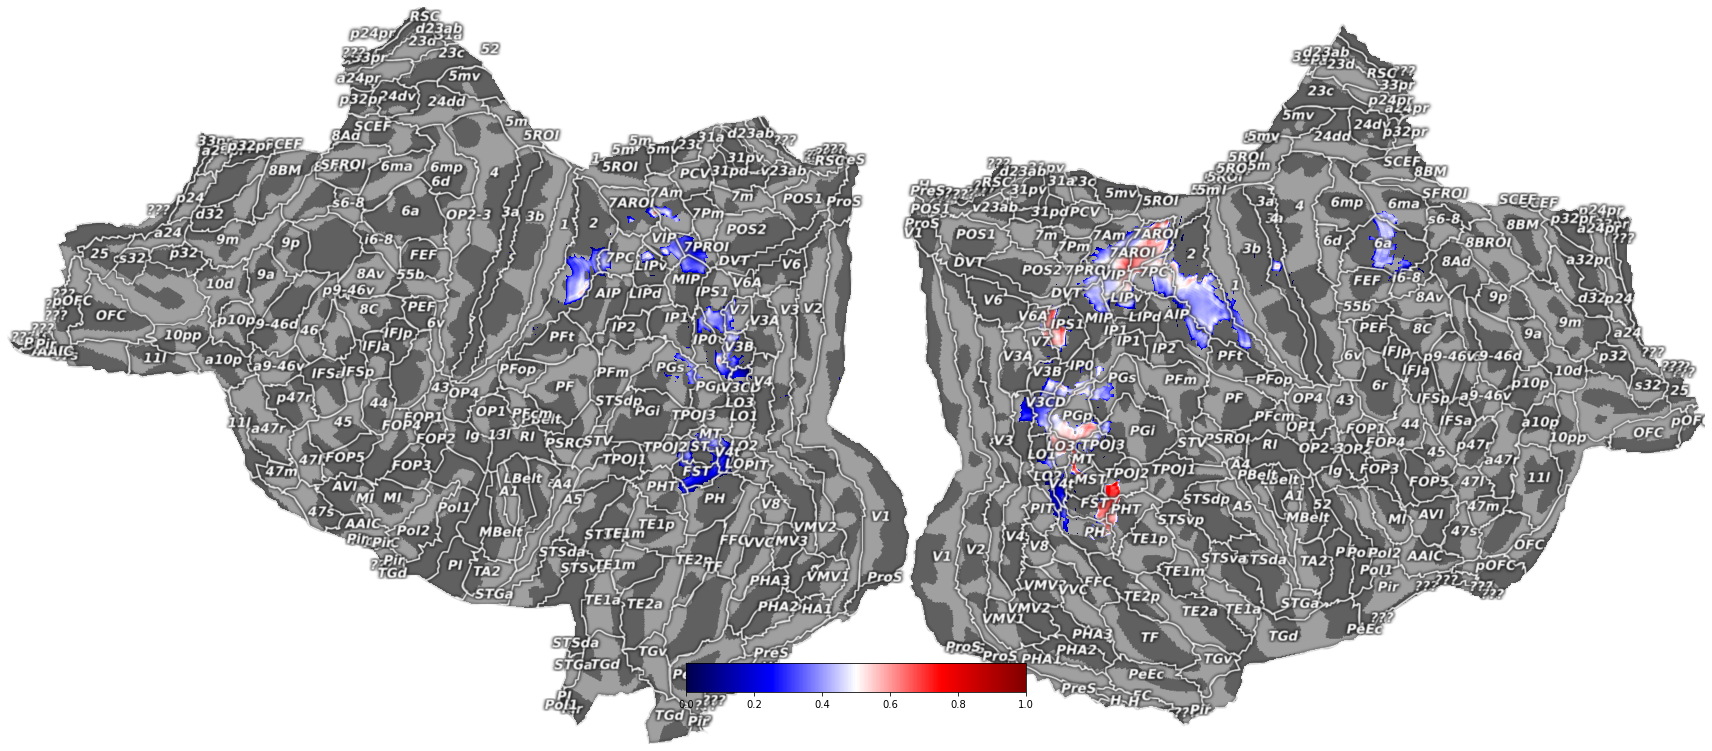

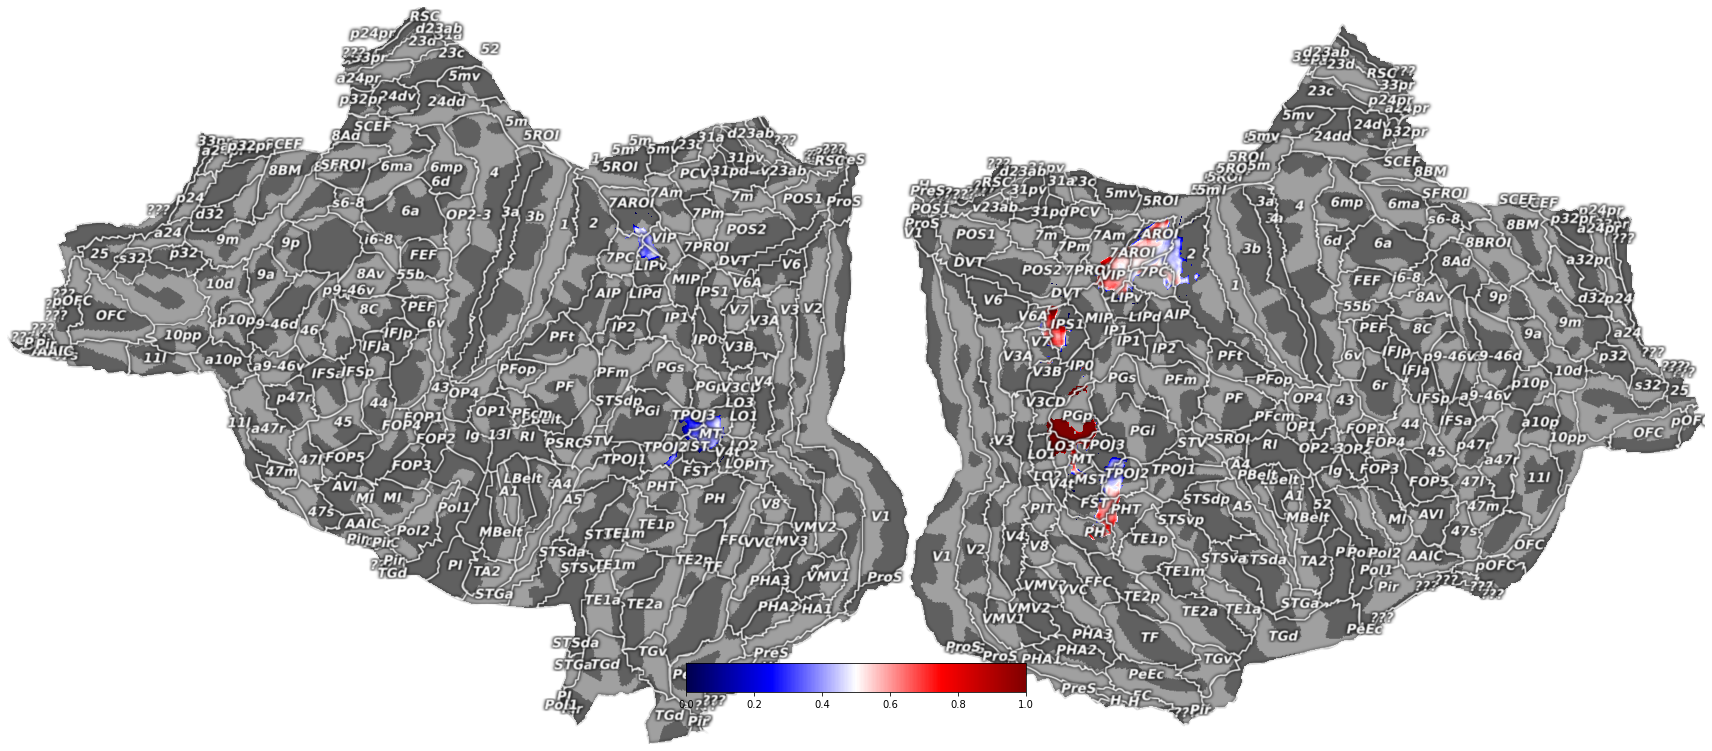

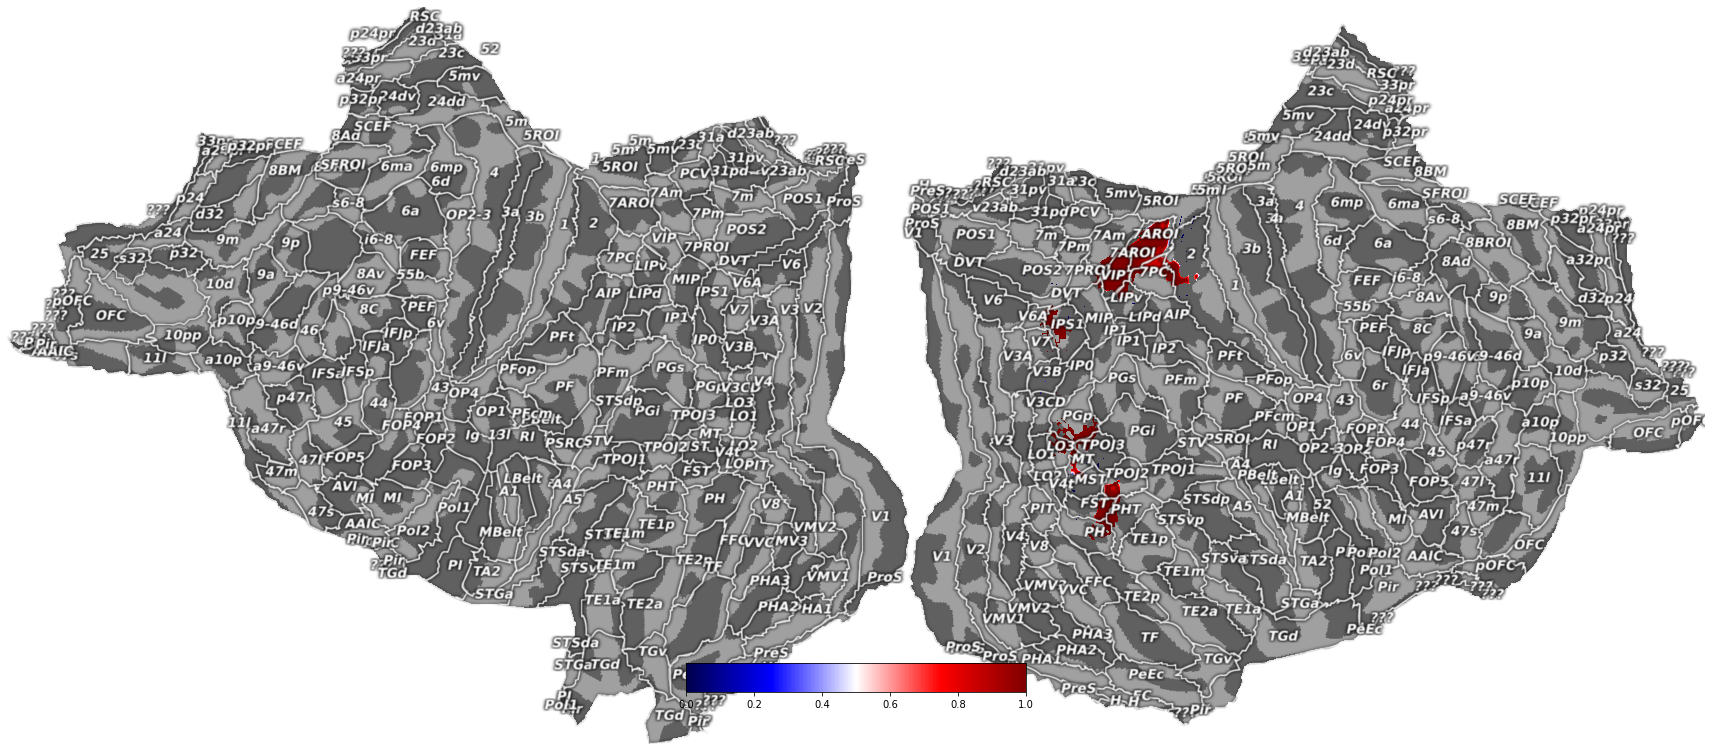

In [5]:
"""
Create continous conjunction maps
"""

conj_dir = f'{study_dir}/results/conjunction'
resample_to_fsaverage = False
for ct in control_tasks:
    if resample_to_fsaverage == True:
        conj = image.load_img(f'{conj_dir}/{ct}_spaceloc_conj.nii.gz')
        conj_img = image.resample_to_img(conj, fsaverage) #resample to MNI
        nib.save(conj_img, f'{conj_dir}/{ct}_spaceloc_conj_fsaverage.nii.gz')
    else:
        conj = image.load_img(f'{conj_dir}/{ct}_spaceloc_conj_fsaverage.nii.gz')
        
    make_conj_flatmap(ct, f'{ct}_spaceloc_conjuction')

In [4]:
def make_stat_figure(exp, max_val, min_val):
    img = f'{study_dir}/whole_brain/{exp}_zstat_fsaverage.nii.gz'
    dv = cortex.Volume(img, subject,xfm, vmax = int(max_val), vmin = int(min_val), cmap = "YlOrRd_r")
    print(max_val)
    dv.data[dv.data <=.1] = np.nan

    cortex.webgl.show(data=dv) 
    cortex.quickflat.make_png(f'{study_dir}/figures/{exp}_flat.png',dv, with_curvature=True, dpi = 300,with_rois= False, with_colorbar = False)

In [5]:
"""
Create whole brain maps for each localizer
"""

exp = 'depthloc'
stat_dir = f'{study_dir}/whole_brain/fsl/HighLevel_{exp}.gfeat/cope1.feat'

#load zstat and cluster mask then convert to np
stat_img = image.load_img(f'{stat_dir}/stats/zstat1.nii.gz')
affine = stat_img.affine
stat_img = image.get_data(stat_img)
max_val = np.max(stat_img)
mask = image.get_data(image.load_img(f'{stat_dir}/cluster_mask_zstat1.nii.gz'))

mask[mask[:,:,:] >0] = 1 
#extract only values in mask
stat_img[mask[:, :, :] != 1] = 0 

stat_img = nib.Nifti1Image(stat_img, affine)
stat_img = image.resample_to_img(stat_img, fsaverage) #resample to MNI
nib.save(stat_img, f'{study_dir}/whole_brain/{exp}_zstat_fsaverage.nii.gz')
         
make_stat_figure(exp, max_val, 3)
#make_flatmap(exp, max_val, 3, f'{exp}_flat')
#r-orient = 240, 60, 400
#l-orient = 130, 60, 400

3.303215
Started server on port 38698


In [32]:
def make_ppi_flatmap(cond, filename, min_val, max_val):
    img = f'{ppi_dir}/{rr}_ppi_fsaverage.nii.gz'
    dv = cortex.Volume(img, subject,xfm,vmin = 2.8, vmax =6,  cmap="YlOrRd_r")
    dv.data[dv.data <=2] = np.nan
    cortex.quickflat.make_figure(dv,with_curvature=True,with_rois= True, with_colorbar = True)
    cortex.quickflat.make_png(f'{study_dir}/figures/spaceloc/{filename}.png',dv, with_curvature=True, dpi = 300,with_rois= False, with_colorbar = False)
    #cortex.webgl.show(data=dv) 

rPPC_spaceloc 3.1427065327822183 5.3544782100077795
rAPC_spaceloc 2.7852775195412565 5.62349515509554


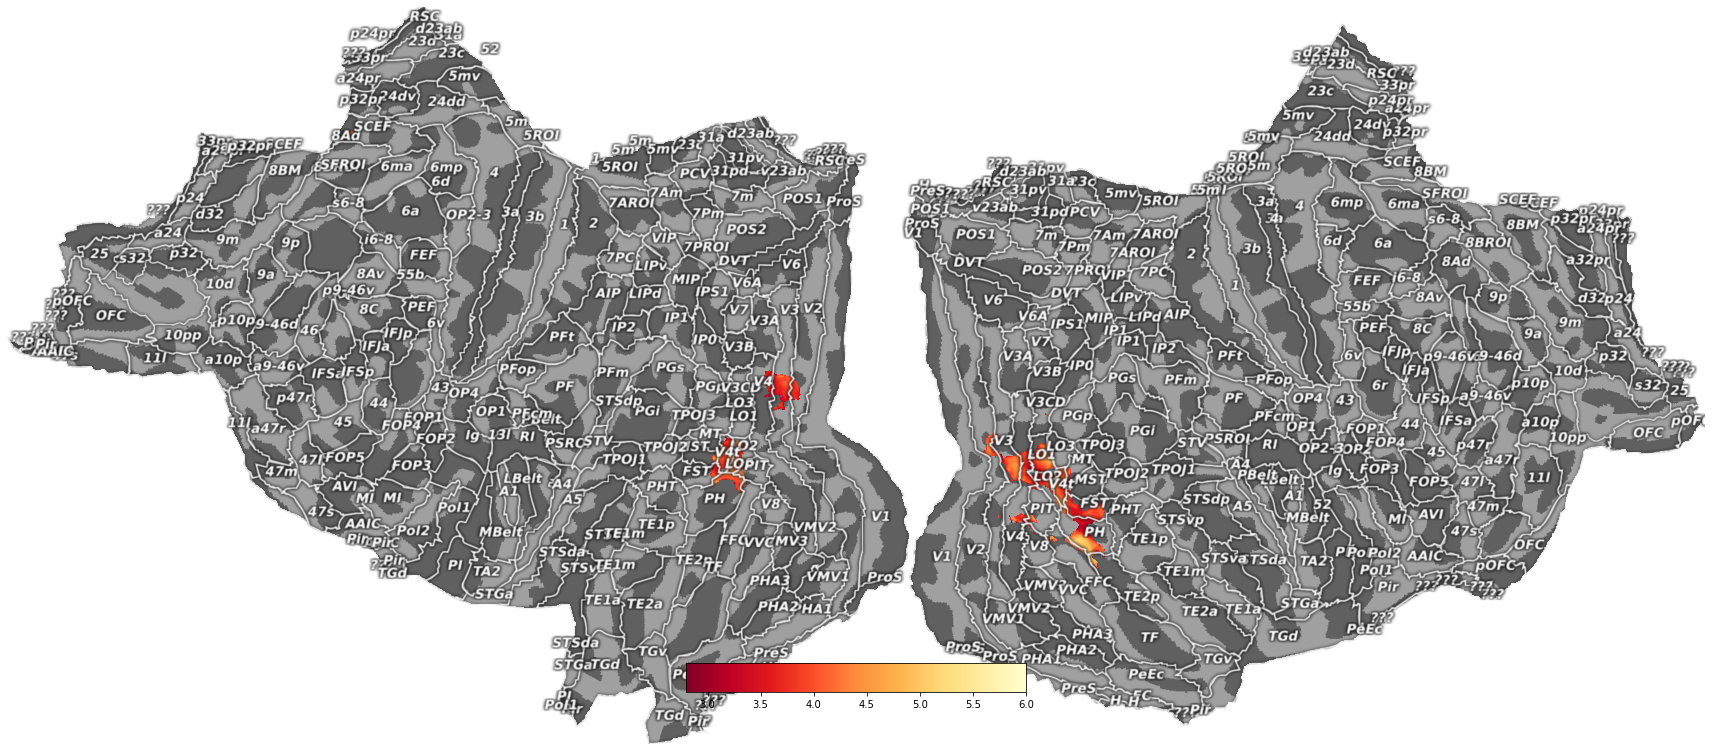

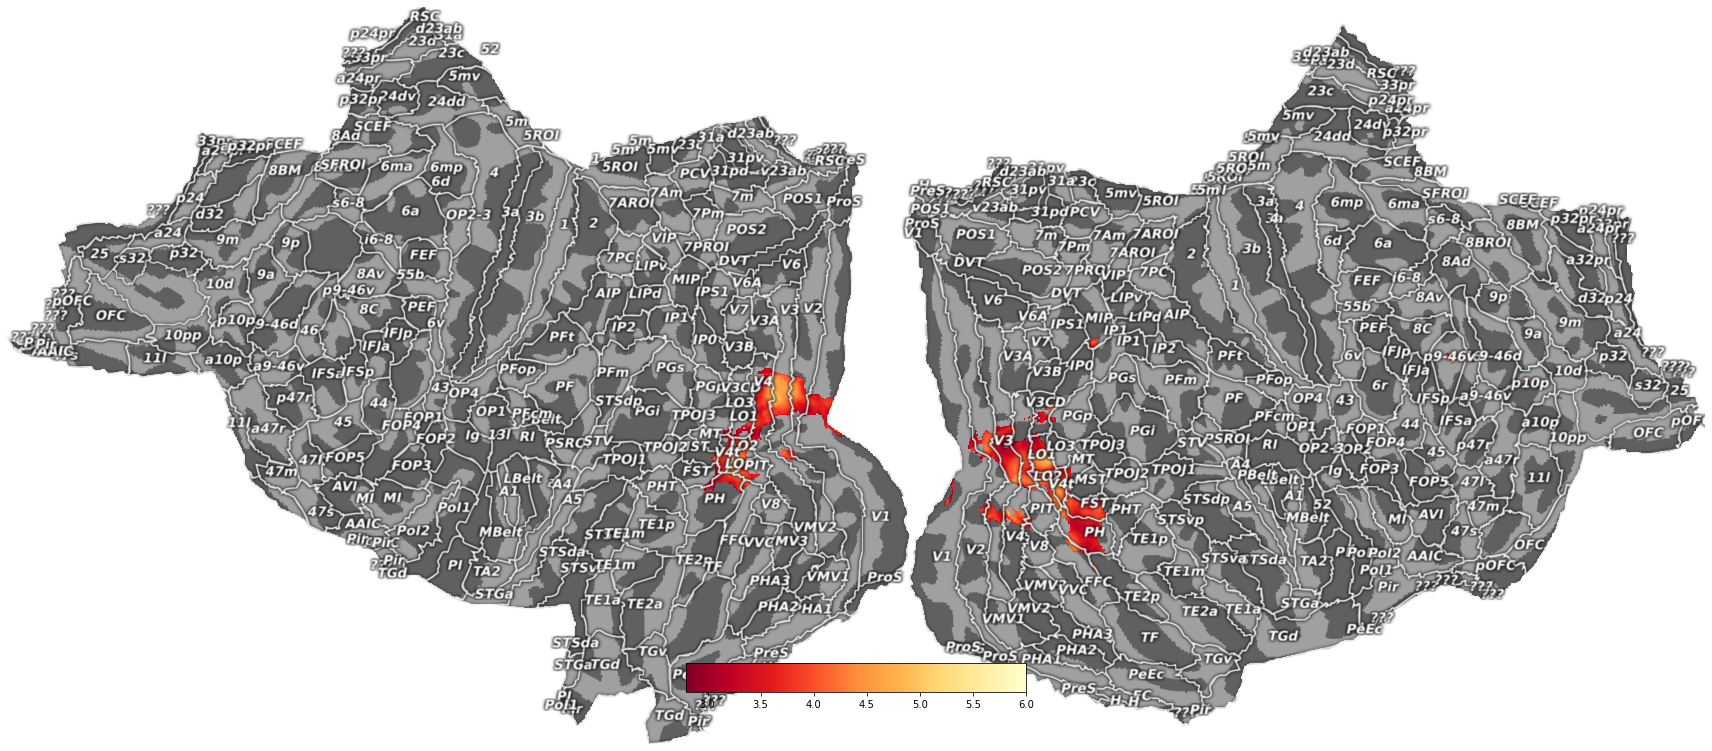

In [33]:
"""
Create maps for PPI
"""
ppi_dir = f'{study_dir}/results/ppi'
rois = ['rPPC_spaceloc', 'rAPC_spaceloc', 'lPPC_spaceloc', 'lAPC_spaceloc', 'lAPC_distloc']
rois = ['rPPC_spaceloc', 'rAPC_spaceloc']

resample_to_fsaverage = True
for rr in rois:
    if resample_to_fsaverage == True:
        ppi = image.load_img(f'{ppi_dir}/{rr}_ppi_stand.nii.gz')
        ppi_img = image.resample_to_img(ppi, fsaverage) #resample to MNI
        nib.save(ppi_img, f'{ppi_dir}/{rr}_ppi_fsaverage.nii.gz')
    else:
        ppi = image.load_img(f'{ppi_dir}/{rr}_ppi_fsaverage.nii.gz')
        
    img_data = image.get_data(ppi)
    max_val = np.max(img_data)
    min_val = np.min(img_data[img_data >0])
    print(rr, min_val, max_val)
        
    make_ppi_flatmap(ppi, f'{rr}_ppi', min_val, max_val)


In [26]:
"""
Create maps for MVPD
"""
ppi_dir = f'{study_dir}/results/ppi'
rois = ['rPPC_spaceloc', 'rAPC_spaceloc', 'lPPC_spaceloc', 'lAPC_spaceloc', 'lAPC_distloc']
rois = ['rPPC_spaceloc', 'rAPC_spaceloc']

resample_to_fsaverage = True
for rr in rois:
    if resample_to_fsaverage == True:
        ppi = image.load_img(f'{ppi_dir}/{rr}_ppi_stand.nii.gz')
        ppi_img = image.resample_to_img(ppi, fsaverage) #resample to MNI
        nib.save(ppi_img, f'{ppi_dir}/{rr}_ppi_fsaverage.nii.gz')
    else:
        ppi = image.load_img(f'{ppi_dir}/{rr}_ppi_fsaverage.nii.gz')
        
    img_data = image.get_data(ppi)
    max_val = np.max(img_data)
    min_val = np.min(img_data[img_data >0])
    print(rr, min_val, max_val)
        
    make_ppi_flatmap(ppi, f'{rr}_ppi', min_val, max_val)


array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal